In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import urllib.request, urllib.parse, urllib.error
import matplotlib.pyplot as plt
%matplotlib inline

# load the training dataset
data = urllib.request.urlopen('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv')
bike_data = pd.read_csv(data)
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp','atemp','hum','windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())

#Separting feautres and labels
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Splitting Data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  
Training Set: 511 rows
Test Set: 220 rows


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

MSE: 104023.08217843524
RMSE: 322.526095344912
R2: 0.7960692762567371


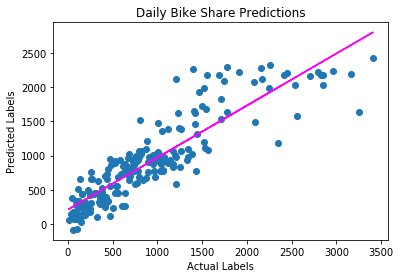

In [3]:
#Training the Model
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

#Fit a lasso model on training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print(model, "\n")

#Evaluating the model using test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(y_test, predictions)
print('R2:', r2)

#Plotting predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

#overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 50} 

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

MSE: 109076.26035938137
RMSE: 330.266953174824
R2: 0.7861628375888619


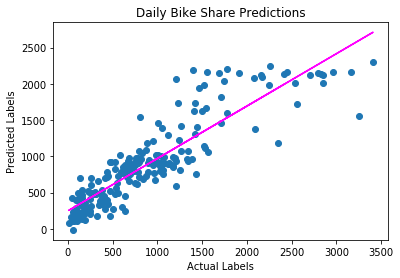

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

#Use a Gradient Boosting algo
alg = GradientBoostingRegressor()

#Trying hyperparameter values
params = {
    'learning_rate': [0.1, 0.5, 1.0],
    'n_estimators': [50, 100, 150]
}

#Finding Best hyperparameter combination to optimize R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print('Best parameter combination:', gridsearch.best_params_, '\n')

#Getting the best model
model = gridsearch.best_estimator_
print(model, '\n')

#Evaluating the model using test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(y_test, predictions)
print('R2:', r2)

#Plotting predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

# Overlaying the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()





In [7]:
# Preprocessing the data
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Defining preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Defining preprocessing for categorical columns (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

#Combining preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

# Creating preprocessing and training Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', GradientBoostingRegressor())])

#Fitting the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print(model)


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(memory=N

MSE: 105010.56822838768
RMSE: 324.05334164052016
R2: 0.7941333718340269


<function matplotlib.pyplot.show(*args, **kw)>

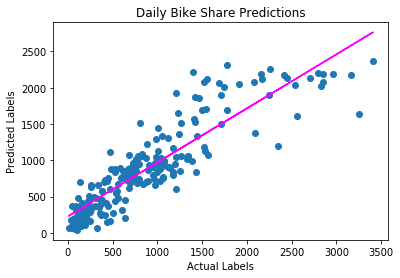

In [11]:
# Getting Predictions



predictions = model.predict(X_test)

# Display Metrics
mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(y_test, predictions)
print('R2:', r2)

# Plotting predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(memory=N

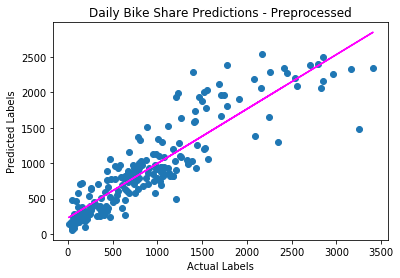

In [12]:
# Using a different Estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', RandomForestRegressor())])

# Fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print(model, '\n')

# Get Predictions
predictions = model.predict(X_test)

# Display Metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plotting predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [13]:
# Saving the model as a pickle file

import joblib

filename = './bike-share.pkl'
joblib.dump(model, filename)

['./bike-share.pkl']

In [20]:
# Loading the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print('New Sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New Sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 101 rentals


In [22]:
# An Array of features based on five-day weather forecast
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('5-day rental Predictions:')
for prediction in results:
    print(np.round(prediction))

5-day rental Predictions:
576.0
704.0
237.0
205.0
265.0
